In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum().max()

0

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<AxesSubplot:>

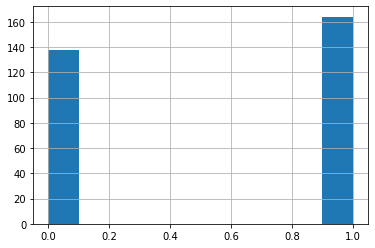

In [10]:
df.target.hist()

In [11]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

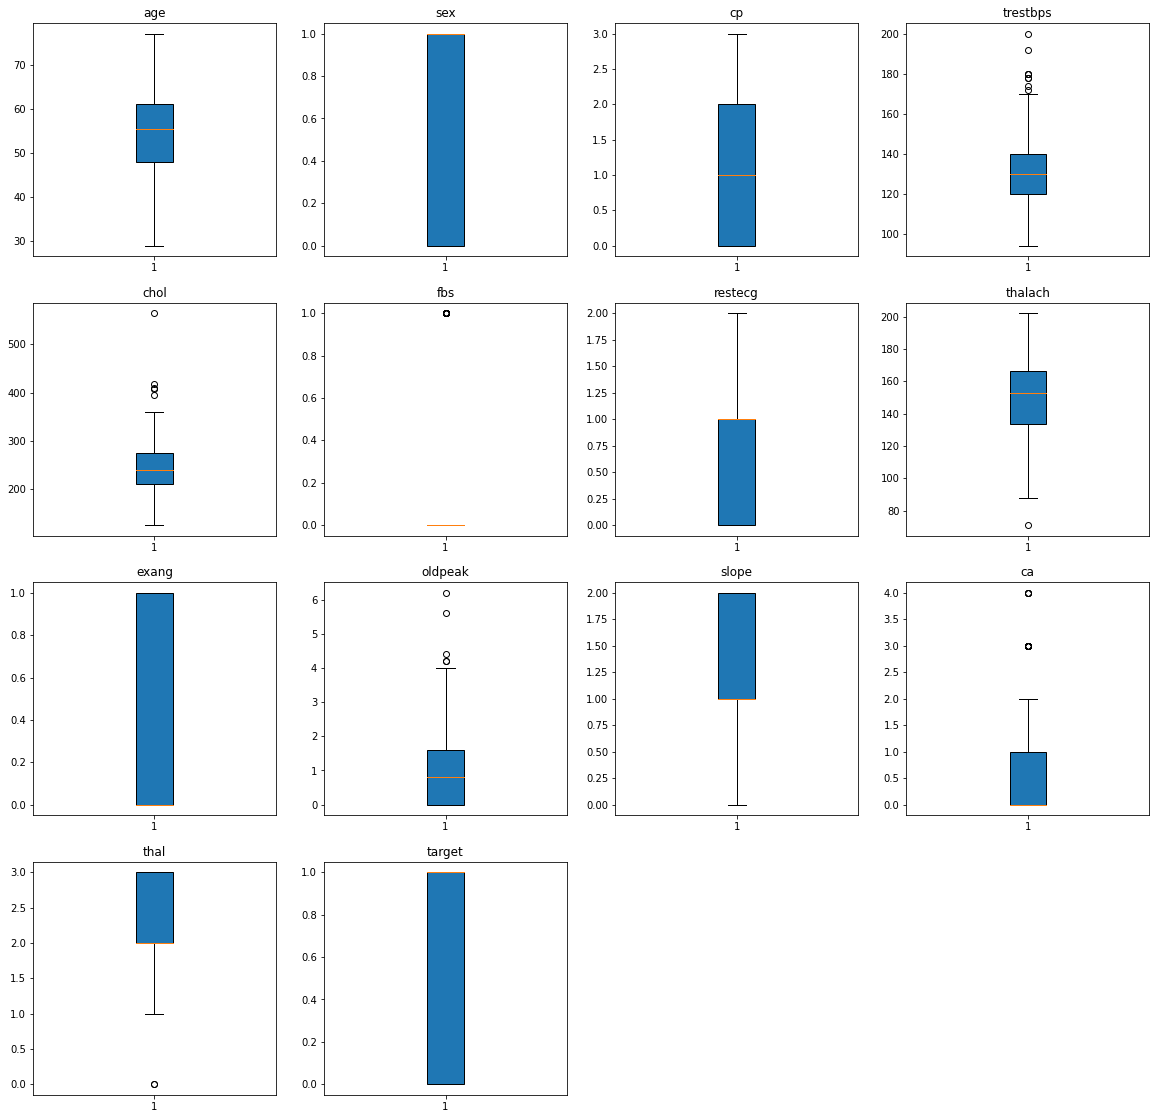

In [12]:
#Assess distribution of features
plt.figure(figsize=(20,30))
i = 1
for column in df.columns:
    plt.subplot(6,4,i)
    plt.boxplot(df[column], patch_artist=True)
    plt.title(column)
    i += 1

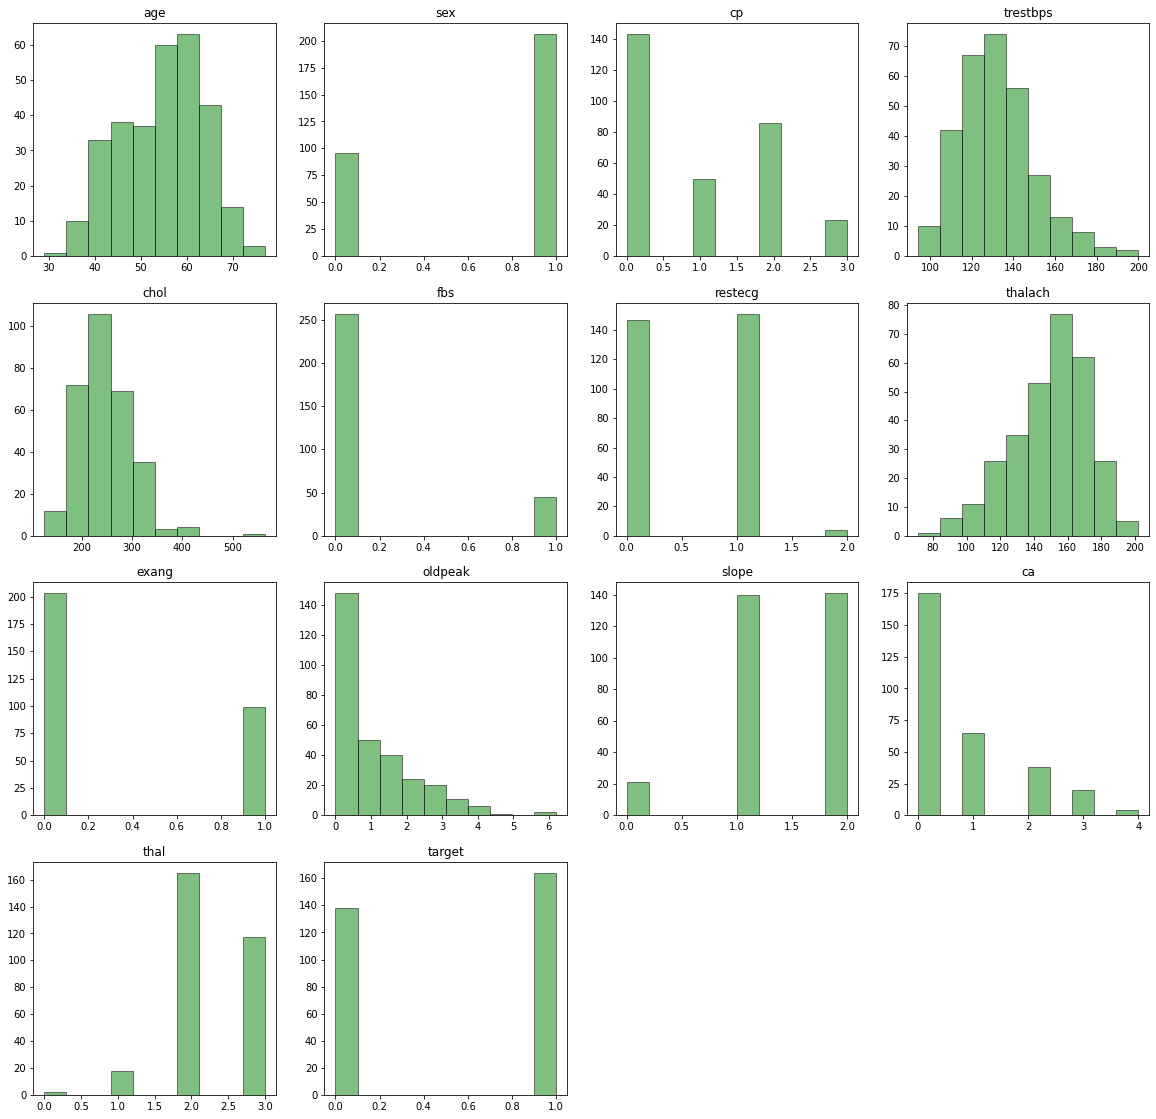

In [13]:
#Assess distribution of features
plt.figure(figsize=(20,30))
i = 1
for column in df.columns:
    plt.subplot(6,4,i)
    plt.hist(df[column], color='green', edgecolor = 'black', alpha = 1/2)
    plt.title(column)
    i += 1

In [14]:
categorical = ['exang','fbs','sex']

In [15]:
numeric_features = ['age','trestbps','oldpeak','thalach','chol','ca','slope','thal']

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
columns_to_normelize = ['trestbps', 'thalach', 'oldpeak','chol']

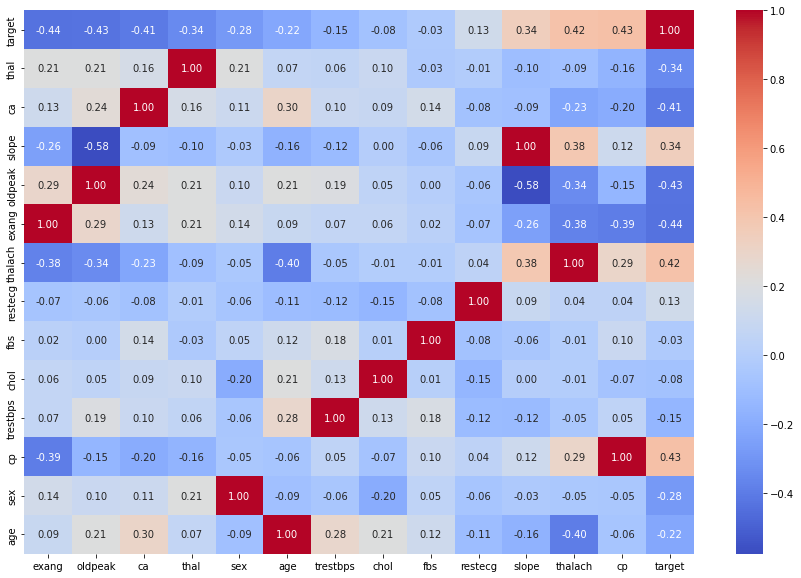

In [18]:
#Sorted heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().sort_values(by='target').T[::-1],cmap='coolwarm',annot=True, fmt=".2f");

In [19]:
def feature_extraction(data):
    #UNIVARIATE SELECTION
    # Feature Extraction with Univariate Statistical Tests (f_clfression)
    # load data
    X = data.drop('target',axis=1)
    y = data['target']
    names=pd.DataFrame(X.columns)
    model = SelectKBest(score_func=f_regression, k=4)
    results = model.fit(X, y)
    
    results_df=pd.DataFrame(results.scores_)
    #Concat and name columns
    scored=pd.concat([names,results_df], axis=1)
    scored.columns = ["Feature", "Score"]
    scored.sort_values(by=['Score'],ascending=False)
    final_columns = scored[scored.Score >0]
    df_sol = final_columns.sort_values(by=['Score'],ascending=True)

    return df_sol

In [20]:
feature_extraction(df)

,Feature,Score
5,fbs,0.216045
4,chol,2.002888
6,restecg,5.558449
3,trestbps,6.558676
0,age,15.474511
1,sex,26.240952
12,thal,40.027376
10,slope,40.249626
11,ca,60.262749
7,thalach,64.237793


In [21]:
#Assess distribution of features
def log_normelize(data, columns_to_normelize):
    plt.figure(figsize=(20,30))
    i = 1
    for column in data[columns_to_normelize]:
        plt.subplot(6,4,i)
        data[column] = np.log1p(data[column])
        plt.hist(data[column])
        plt.title(column)
        i += 1

In [22]:
features = df.drop('target', axis=1).columns

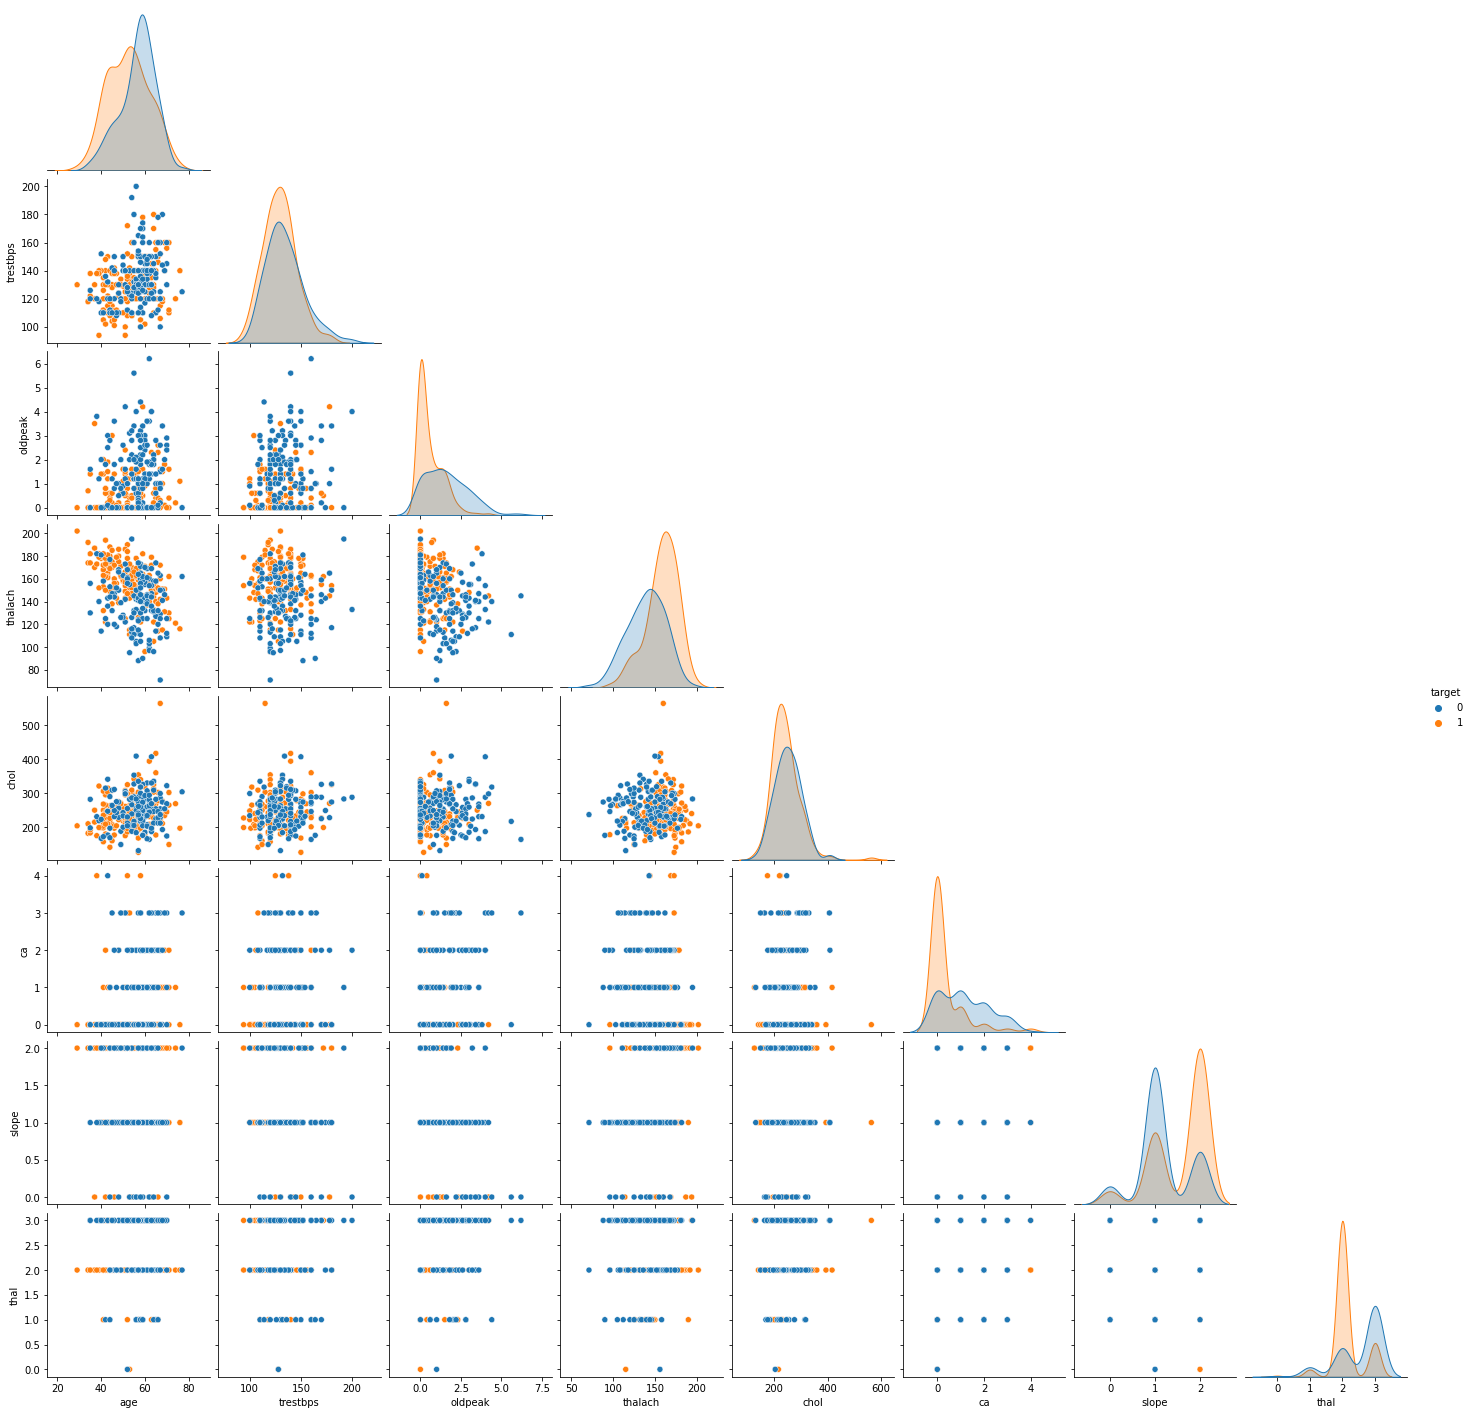

In [23]:
numeric_features.append('target')
sns.pairplot(data=df[numeric_features], hue='target', corner=True)

### CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest,f_regression
import matplotlib.pyplot as plt
import pandas as pd




In [25]:
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import pickle
from clf_model import ClfModel

In [26]:
# Model configuration
    # Classification params
params = {'lgb_clf': {'boosting_type': ['gbdt'],
                          'objective': ['regression'],
                          'learning_rate': [0.01, 0.03],
                          'n_estimators': [100, 500],
                          'max_depth': [4, 8],
                          'min_child_samples': [10, 20],
                          'min_child_weight': [0.01, 0.05]
                          },
              'xgb_clf': {'objective': ['reg:squarederror'],
                          'max_depth': [6],
                          'min_child_weight': [7],
                          'learning_rate': [0.01],
                          'subsample': [0.7],
                          'n_jobs': [-1]
                          },
              'cat_clf': {}
              }
models = {'xgb_clf': XGBClassifier,
              'lgb_clf': LGBMClassifier,
              'cat_clf': CatBoostClassifier
              }

In [27]:
# Prepare the data for the model
df_clf = pd.read_csv('data/heart_final.csv')
df_clf.drop('Unnamed: 0', axis=1, inplace=True)
df_clf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,4.983607,5.455321,1,0,5.017280,0,1.193922,0,0,1,1
1,37,1,2,4.875197,5.525453,0,1,5.236442,0,1.504077,0,0,2,1
2,41,0,1,4.875197,5.323010,0,0,5.153292,0,0.875469,2,0,2,1
3,56,1,1,4.795791,5.468060,0,1,5.187386,0,0.587787,2,0,2,1
4,57,0,0,4.795791,5.872118,0,1,5.099866,1,0.470004,2,0,2,1


## XGBoost

In [28]:
#Inittialize the model
xgb_clf_model = ClfModel(data=df_clf, model=models['xgb_clf'])

Preparing the data
Running on a new model
Done preprocessing procedures -> Fit & Predict
Saving new model to file: models/XGBClassifier.sav
Accuracy/Score: 0.819672131147541
Precision = 0.7948717948717948

Confusion Matrix:
 [[19  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8636    0.7037    0.7755        27
           1     0.7949    0.9118    0.8493        34

    accuracy                         0.8197        61
   macro avg     0.8293    0.8077    0.8124        61
weighted avg     0.8253    0.8197    0.8166        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


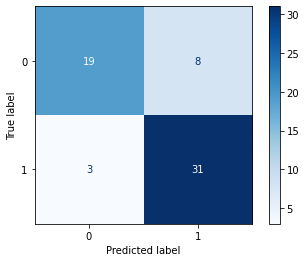

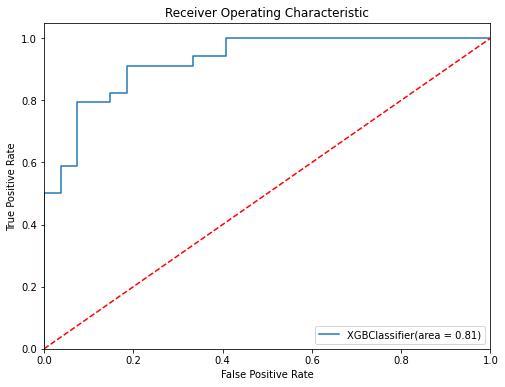

In [29]:
# Run on default model
xgb_train_score, xgb_test_score = xgb_clf_model.fit_predict_score(data=df_clf,
                                                                  show=1,
                                                                  opt=0,
                                                                  lpick=0,
                                                                  spick=1)

In [30]:
# Initialize the model with params for hyperparameters tuning 
xgb_clf_model = ClfModel(data=df_clf,
                         model=models['xgb_clf'],
                         params=params['xgb_clf'])

Preparing the data
Searching for saved pickle model file
Loading model XGBClassifier.sav from file
Finding best params with GridSearch
Done preprocessing procedures -> Fit & Predict
Saving new model to file: models/XGBClassifier.sav
Accuracy/Score: 0.8360655737704918
Precision = 0.8157894736842105

Confusion Matrix:
 [[20  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8696    0.7407    0.8000        27
           1     0.8158    0.9118    0.8611        34

    accuracy                         0.8361        61
   macro avg     0.8427    0.8263    0.8306        61
weighted avg     0.8396    0.8361    0.8341        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


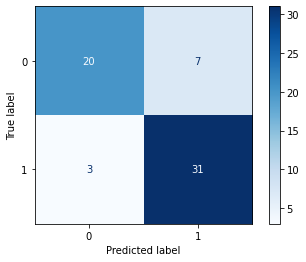

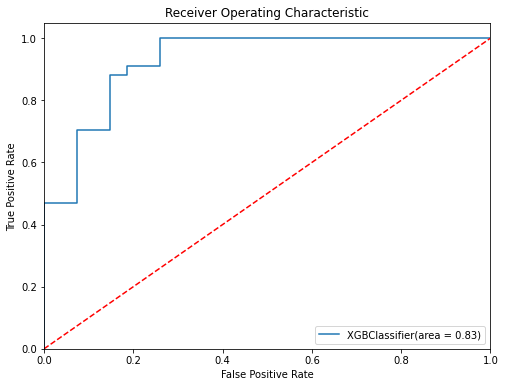

In [31]:
# Run with params for hyperparameters tuning
xgb_train_score, xgb_test_score = xgb_clf_model.fit_predict_score(data=df_clf,
                                                                  show=1,
                                                                  opt=0,
                                                                  lpick=1,
                                                                  spick=1)
xgb_clf_model.best_score = xgb_test_score

In [32]:
opt_df = xgb_clf_model.optimize_model()

Checking to drop: fbs
Preparing the data
Done preprocessing procedures -> Fit & Predict
new_test_score: 0.8360655737704918 --- self.best_score: 0.8360655737704918
Checking to drop: chol
Preparing the data
Done preprocessing procedures -> Fit & Predict
new_test_score: 0.8360655737704918 --- self.best_score: 0.8360655737704918
Checking to drop: restecg
Preparing the data
Done preprocessing procedures -> Fit & Predict
new_test_score: 0.8360655737704918 --- self.best_score: 0.8360655737704918
Checking to drop: trestbps
Preparing the data
Done preprocessing procedures -> Fit & Predict
new_test_score: 0.8524590163934426 --- self.best_score: 0.8360655737704918
Checking to drop: age
Preparing the data
Done preprocessing procedures -> Fit & Predict
new_test_score: 0.8360655737704918 --- self.best_score: 0.8524590163934426
Abort deleting feature, optimization completed


Preparing the data
Searching for saved pickle model file
Loading model XGBClassifier.sav from file
Finding best params with GridSearch
Done preprocessing procedures -> Fit & Predict
Saving new model to file: models/XGBClassifier.sav
Accuracy/Score: 0.8524590163934426
Precision = 0.8378378378378378

Confusion Matrix:
 [[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8750    0.7778    0.8235        27
           1     0.8378    0.9118    0.8732        34

    accuracy                         0.8525        61
   macro avg     0.8564    0.8448    0.8484        61
weighted avg     0.8543    0.8525    0.8512        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


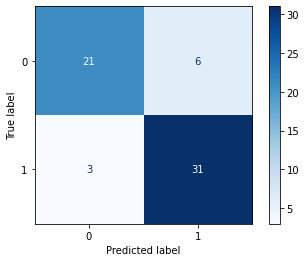

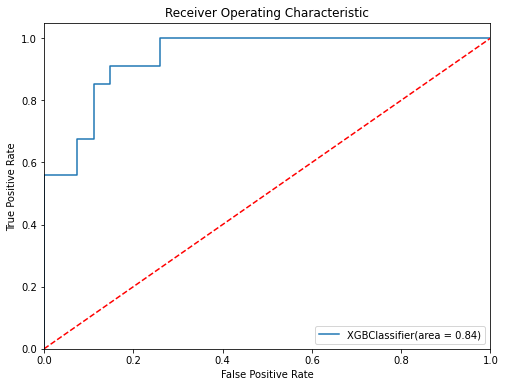

In [33]:
# Load the new df to the model
# Also can init the model: xgb_clf_model = ClfModel(data=opt_df, model=models['xgb_clf'])
xgb_train_score, xgb_test_score = xgb_clf_model.fit_predict_score(data=opt_df,
                                                                  show=1,
                                                                  opt=0,
                                                                  lpick=1,
                                                                  spick=1)

## CATBoost

In [34]:
import catboost as cb

In [35]:
X, y = opt_df.drop(['target'],axis=1), opt_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [37]:
cat_clf = cb.CatBoostClassifier(task_type='GPU', 
                                loss_function='Logloss',  
                                random_state=10,
                                silent = True
                                )

In [38]:
grid = {'learning_rate': [0.4],
        'depth': [10],
        'l2_leaf_reg': [5],
        'iterations': [50],
        }
cat_clf.grid_search(grid, train_dataset)
pickle.dump(cat_clf, open(f"models/{cat_clf.__class__.__name__}", 'wb'))

bestTest = 0.3100996796
bestIteration = 11
0:	loss: 0.3100997	best: 0.3100997 (0)	total: 8.97s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
bestTest = 0.3708877799
bestIteration = 7
Training on fold [1/3]
bestTest = 0.4266173363
bestIteration = 4
Training on fold [2/3]
bestTest = 0.4224006176
bestIteration = 11


In [49]:
y_test_pred = cat_clf.predict(X_test)
y_train_pred = cat_clf.predict(X_train)
cat_test_score = accuracy_score(y_test, y_test_pred)
cat_train_score = accuracy_score(y_train, y_train_pred)


Accuracy/Score: 0.8524590163934426
Precision = 0.8048780487804879

Confusion Matrix:
 [[19  8]
 [ 1 33]]
              precision    recall  f1-score   support

           0     0.9500    0.7037    0.8085        27
           1     0.8049    0.9706    0.8800        34

    accuracy                         0.8525        61
   macro avg     0.8774    0.8371    0.8443        61
weighted avg     0.8691    0.8525    0.8484        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


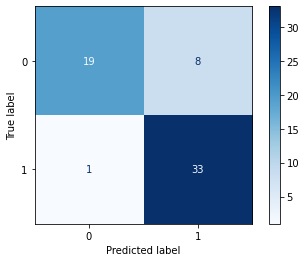

In [50]:
def print_results():
    print(f"Accuracy/Score: {accuracy_score(y_test, y_test_pred)}")
    print(f"Precision = {precision_score(y_test, y_test_pred)}\n")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_test_pred)}")
    plot_confusion_matrix(cat_clf, X_test, y_test, values_format="d", cmap='Blues')
    print(classification_report(y_test, y_test_pred, digits=4))
print_results()

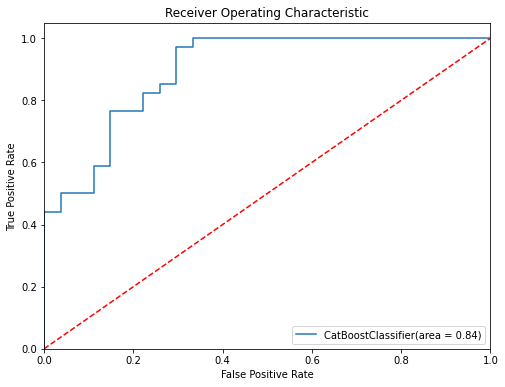

In [51]:
def roc(clf_model):
    logit_roc_auc = roc_auc_score(y_test, clf_model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf_model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{clf_model.__class__.__name__}(area = {round(logit_roc_auc,2)})")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
roc(cat_clf)

## LightBGM

In [52]:
#Inittialize the model
lgb_clf_model = ClfModel(data=opt_df, model=models['lgb_clf'])

Preparing the data
Running on a new model
Done preprocessing procedures -> Fit & Predict
Saving new model to file: models/LGBMClassifier.sav
Accuracy/Score: 0.8360655737704918
Precision = 0.8157894736842105

Confusion Matrix:
 [[20  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8696    0.7407    0.8000        27
           1     0.8158    0.9118    0.8611        34

    accuracy                         0.8361        61
   macro avg     0.8427    0.8263    0.8306        61
weighted avg     0.8396    0.8361    0.8341        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


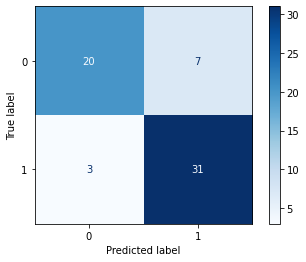

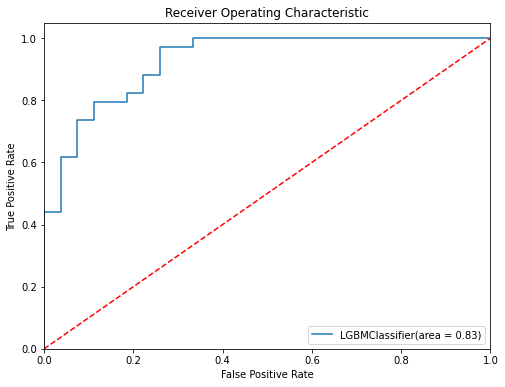

In [53]:
# Run on default model
lgb_train_score, lgb_test_score = lgb_clf_model.fit_predict_score(data=opt_df,
                                                                  show=1,
                                                                  opt=0,
                                                                  lpick=0,
                                                                  spick=1)

In [54]:
# Initialize the model with params for hyperparameters tuning 
lgb_clf_model = ClfModel(data=opt_df, model=models['lgb_clf'], params=params['lgb_clf'])

Preparing the data
Searching for saved pickle model file
Loading model LGBMClassifier.sav from file
Finding best params with GridSearch
Done preprocessing procedures -> Fit & Predict
Saving new model to file: models/LGBMClassifier.sav
Accuracy/Score: 0.8688524590163934
Precision = 0.825

Confusion Matrix:
 [[20  7]
 [ 1 33]]
              precision    recall  f1-score   support

           0     0.9524    0.7407    0.8333        27
           1     0.8250    0.9706    0.8919        34

    accuracy                         0.8689        61
   macro avg     0.8887    0.8557    0.8626        61
weighted avg     0.8814    0.8689    0.8660        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


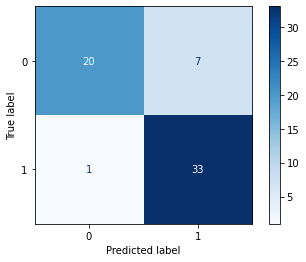

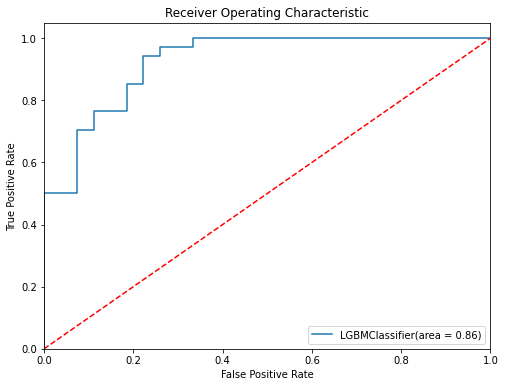

In [55]:
# Run with params for hyperparameters tuning
lgb_train_score, lgb_test_score = lgb_clf_model.fit_predict_score(data=opt_df,
                                                                  show=1,
                                                                  opt=0,
                                                                  lpick=1,
                                                                  spick=1)

**Conclusion**

In [56]:
results = {
    'xgb': {'r_train': xgb_train_score, 'r_test': xgb_test_score},
    'cat': {'r_train': cat_train_score, 'r_test': cat_test_score},
    'lgb': {'r_train': lgb_train_score, 'r_test': lgb_test_score}
}

In [57]:
score_df = pd.DataFrame.from_dict(results, orient='index', columns=['r_train', 'r_test'])
score_df.head(10)

,r_train,r_test
xgb,0.904564,0.852459
cat,0.995851,0.852459
lgb,0.921162,0.868852


Text(0, 0.5, 'R2 Score')

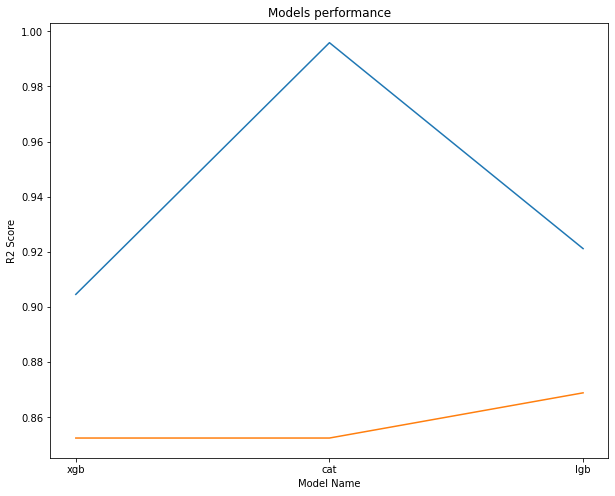

In [59]:
plt.figure(figsize=(10,8))
plt.plot(score_df)
plt.title('Models performance')
plt.xlabel('Model Name')
plt.ylabel('R2 Score')